In [1]:
# Imports basicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ler o arquivo de dados
# por questoes de implementacao vou trocar o nome das colunas
colunas = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60', 'year', 'brand']
df = pd.read_csv('./data/cars.csv')
df.columns = colunas
df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
# Informações sobre o data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time_to_60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [4]:
# dados estatísticos sobre o data frame
df.describe()

,mpg,cylinders,hp,time_to_60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
# classes contidas na coluna brand
df['brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [35]:
dfDesafio = df.copy()
# aqui os valores que nao conseguir fzer o parse se transforma em NaN
dfDesafio['weightlbs'] = pd.to_numeric(dfDesafio['weightlbs'], errors='coerce') 
dfDesafio['cubicinches'] = pd.to_numeric(dfDesafio['cubicinches'], errors='coerce')

In [36]:
dfDesafio.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time_to_60     0
year           0
brand          0
dtype: int64

In [40]:
# substituir os valores nulos pela media
values_fillna = {'cubicinches': dfDesafio['cubicinches'].mean(), 'weightlbs': dfDesafio['weightlbs'].mean()}
dfDesafio = dfDesafio.fillna(value=values_fillna)
dfDesafio.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [44]:
# Normalizar do data frame
# ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']
dfDesafio_ = dfDesafio[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60', 'year']]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfDesafio_escalonado=sc.fit_transform(dfDesafio_)

In [53]:
# maior valor da variavel HP
dfDesafio_escalonado[:, 3].max()

3.05870398977614

In [62]:
# Aplicacao do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x_9d = pca.fit_transform(dfDesafio_escalonado)
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [71]:
x_9d[:,:3].shape

(261, 3)

In [72]:
# aplicando o Kmeans com os tres primeiros componentes principais
# importar o modelo de KMeans
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3, random_state = 42)
 
# treinando o modelo no conjunto de dados de treino
clustering.fit(x_9d[:,:3]);

In [73]:
clustering.cluster_centers_

array([[-2.29851297, -0.51022343, -0.31004396],
       [ 3.08082252, -0.19838979, -0.09386317],
       [-0.49611183,  0.4969398 ,  0.28360663]])

In [89]:
#['cylinders'    ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] [:,1:6]
x_arvore = dfDesafio_[['cylinders','cubicinches' ,'hp' ,'weightlbs','time_to_60']]
x_pca_arvore = x_9d[:,1:6]
y_arvore = [1 if i > 25 else 0 for i in df['mpg']]

In [79]:
print('eficiente?',y_arvore[1])
print('valor:',df['mpg'][1])

eficiente? 1
valor: 31.9


In [90]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x_arvore, y_arvore, test_size=0.30,random_state=42)

In [91]:
# aplicando arvore de decisao 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X=train_data, y=train_labels)

DecisionTreeClassifier(random_state=42)

In [92]:
predictions = clf.predict(test_data)

In [93]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions))

Matriz de Confusão
 [[33  8]
 [ 2 36]]

Acurácia
 0.8734177215189873

Acurácia Balanceada por classe
 0.8761232349165597

Precision
 0.8181818181818182

Recall
 0.9473684210526315

F1
 0.8780487804878049

AUCROC
 0.8761232349165596


In [94]:
train_data, test_data, train_labels, test_labels = train_test_split(x_arvore, y_arvore, test_size=0.50,random_state=42)
from sklearn.linear_model import LogisticRegression
clf_r = LogisticRegression(random_state=42).fit(train_data, train_labels)
predictions1 = clf_r.predict(test_data)

In [95]:
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions1)) 


Acurácia
 0.8854961832061069


In [6]:
# One Hot Encoding em Brand
df1 = pd.get_dummies(df, columns = ['brand'] )

# visualizando o resultado
df1.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.
0,14.0,8,350,165,4209,12,1972,0,0,1
1,31.9,4,89,71,1925,14,1980,1,0,0
2,17.0,8,302,140,3449,11,1971,0,0,1
3,15.0,8,400,150,3761,10,1971,0,0,1
4,30.5,4,98,63,2051,17,1978,0,0,1


In [7]:
df1.query("weightlbs == ' '")

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.
14,19.1,6,225,90,,19,1981,0,0,1
33,21.0,6,199,90,,15,1971,0,0,1
172,29.0,4,68,49,,20,1974,1,0,0


In [8]:
df1['weightlbs']=df1['weightlbs'].replace(' ', '0')
df1.query("weightlbs == ' '")

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.


In [9]:
# transformar weightlbs em numerico
df1['weightlbs']=df1['weightlbs'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             261 non-null    float64
 1   cylinders       261 non-null    int64  
 2   cubicinches     261 non-null    object 
 3   hp              261 non-null    int64  
 4   weightlbs       261 non-null    int64  
 5   time_to_60      261 non-null    int64  
 6   year            261 non-null    int64  
 7   brand_ Europe.  261 non-null    uint8  
 8   brand_ Japan.   261 non-null    uint8  
 9   brand_ US.      261 non-null    uint8  
dtypes: float64(1), int64(5), object(1), uint8(3)
memory usage: 15.2+ KB


In [10]:
df1.query("cubicinches == ' '")

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.
40,16.0,6,,105,3897,19,1976,0,0,1
180,19.8,6,,85,2990,18,1980,0,0,1


In [11]:
df1['cubicinches']=df1['cubicinches'].replace(' ', '0')
df1.query("cubicinches == ' '")

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.


In [12]:
# transformar weightlbs em numerico
df1['cubicinches']=df1['cubicinches'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             261 non-null    float64
 1   cylinders       261 non-null    int64  
 2   cubicinches     261 non-null    int64  
 3   hp              261 non-null    int64  
 4   weightlbs       261 non-null    int64  
 5   time_to_60      261 non-null    int64  
 6   year            261 non-null    int64  
 7   brand_ Europe.  261 non-null    uint8  
 8   brand_ Japan.   261 non-null    uint8  
 9   brand_ US.      261 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 15.2 KB


In [13]:
df1.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,199.379310,106.360153,2975.237548,15.547893,1976.819923,0.183908,0.195402,0.620690
std,7.823570,1.733310,110.243811,40.499959,907.905975,2.910625,3.637696,0.388153,0.397272,0.486148
min,10.000000,3.000000,0.000000,46.000000,0.000000,8.000000,1971.000000,0.000000,0.000000,0.000000
25%,16.900000,4.000000,98.000000,75.000000,2230.000000,14.000000,1974.000000,0.000000,0.000000,0.000000
50%,22.000000,6.000000,156.000000,95.000000,2830.000000,16.000000,1977.000000,0.000000,0.000000,1.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000,1.000000,1.000000,1.000000


In [14]:
# colocando os dados em uma mesma escala


In [15]:
# Correlação de Pearson
df1.corr(method='pearson')

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand_ Europe.,brand_ Japan.,brand_ US.
mpg,1.000000,-0.776710,-0.782744,-0.774905,-0.769895,0.509070,0.550441,0.265274,0.446372,-0.576570
cylinders,-0.776710,1.000000,0.935793,0.845155,0.842176,-0.578161,-0.322239,-0.396294,-0.408256,0.650032
cubicinches,-0.782744,0.935793,1.000000,0.898781,0.859892,-0.617107,-0.349829,-0.391721,-0.426212,0.661054
hp,-0.774905,0.845155,0.898781,1.000000,0.829966,-0.744873,-0.383869,-0.310059,-0.329734,0.517013
weightlbs,-0.769895,0.842176,0.859892,0.829966,1.000000,-0.478553,-0.245000,-0.307931,-0.405810,0.577481
time_to_60,0.509070,-0.578161,-0.617107,-0.744873,-0.478553,1.000000,0.312311,0.264524,0.146545,-0.330957
year,0.550441,-0.322239,-0.349829,-0.383869,-0.245000,0.312311,1.000000,-0.063621,0.189450,-0.104018
brand_ Europe.,0.265274,-0.396294,-0.391721,-0.310059,-0.307931,0.264524,-0.063621,1.000000,-0.233941,-0.607254
brand_ Japan.,0.446372,-0.408256,-0.426212,-0.329734,-0.405810,0.146545,0.189450,-0.233941,1.000000,-0.630399
brand_ US.,-0.576570,0.650032,0.661054,0.517013,0.577481,-0.330957,-0.104018,-0.607254,-0.630399,1.000000


In [16]:
# Verificando features com correlação 0,9 e acima
corr = df1.corr(method='pearson')
columns = np.full((corr.shape[0],), False, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if not columns[j]:
                columns[j] = True
print('A coluna com alta correlacao é:', df1.columns[columns])

A coluna com alta correlacao é: Index(['cubicinches'], dtype='object')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


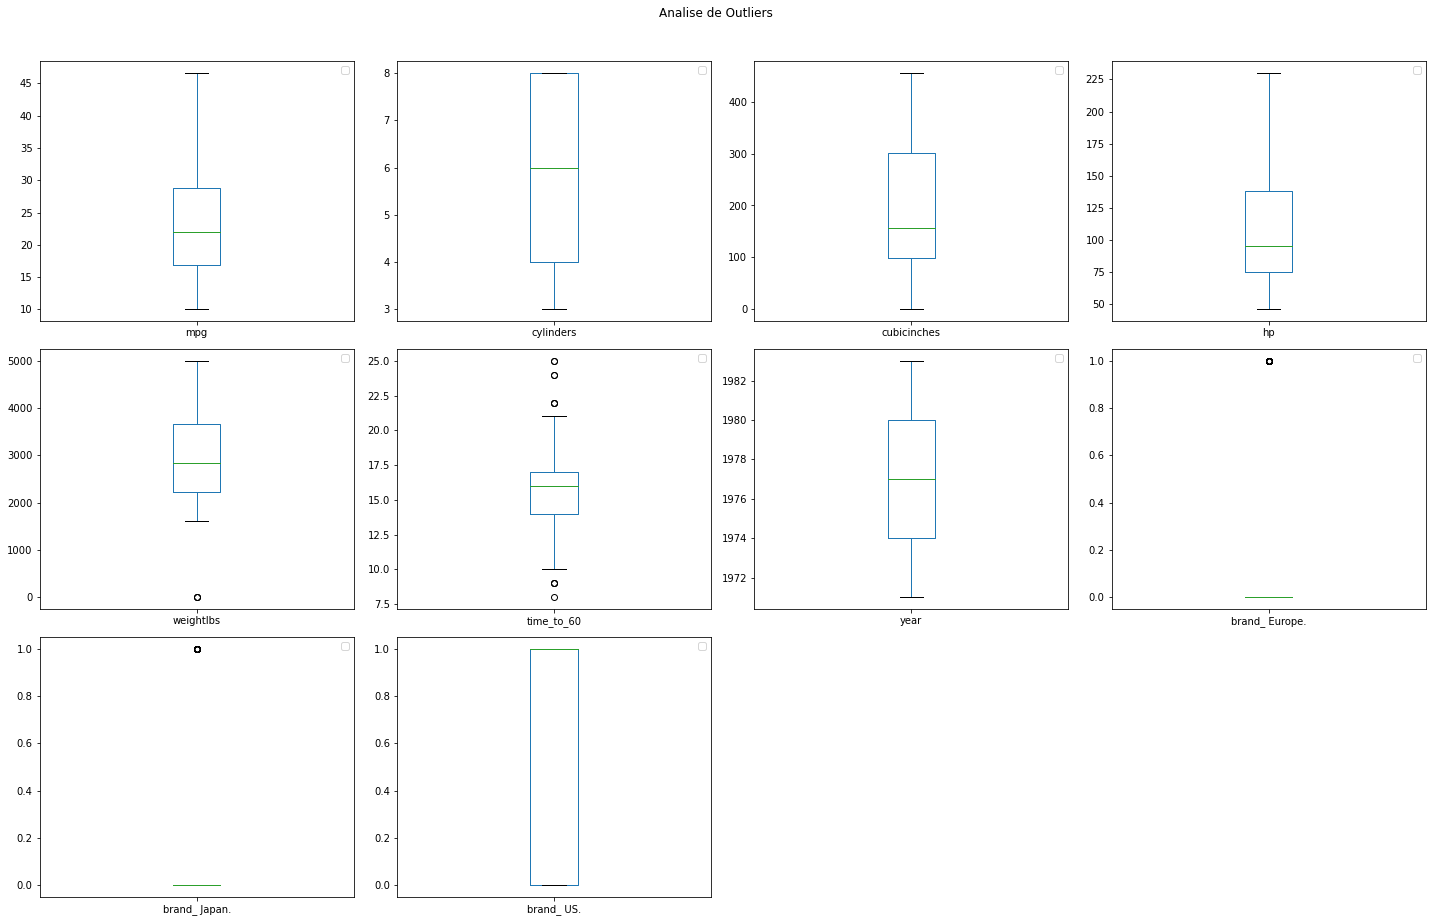

In [17]:
# plot box para verificar outliers
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df1.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    df1[i].plot(kind='box')
    plt.legend()
fig.suptitle('Analise de Outliers')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
#df1.plot(kind='box')

In [18]:
def outlier(q1, q3):
    DIQ = (q3 - q1)
    return (q1 - (1.5 * DIQ)), (q3 + (1.5 * DIQ))

In [26]:
columns_outliers = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60', 'year']
lista_data_frames = []
for i in columns_outliers:
    count, media, std, mini, q1, q2, q3, maxi = df1[i].describe()
    inf, sup = outlier(q1, q3)
    dataFrame = pd.DataFrame(df1.query(f'{i} < {inf} or {i} > {sup}')[i])
    if (dataFrame.size > 0):
        lista_data_frames.append(dataFrame)
        print(f'Valores menores que {inf} e maior que {sup} são outliers para {i}\n')
        print(dataFrame)

Valores menores que 79.0 e maior que 5815.0 são outliers para weightlbs

     weightlbs
14           0
33           0
172          0
Valores menores que 9.5 e maior que 21.5 são outliers para time_to_60

     time_to_60
7             9
51           25
52            8
106          24
164          24
197          22
202          22
205           9
235          25
244           9
247          22


In [20]:
df1.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand_ Europe.', 'brand_ Japan.', 'brand_ US.'],
      dtype='object')

In [31]:
# desta forma eu consigo pegar todos os indeces que contem outliers caso eu precise excluir estas instancias
for dtframe in lista_data_frames:
    print(df1.iloc[dtframe.index])

      mpg  cylinders  cubicinches  hp  weightlbs  time_to_60  year  \
14   19.1          6          225  90          0          19  1981   
33   21.0          6          199  90          0          15  1971   
172  29.0          4           68  49          0          20  1974   

     brand_ Europe.  brand_ Japan.  brand_ US.  
14                0              0           1  
33                0              0           1  
172               1              0           0  
      mpg  cylinders  cubicinches   hp  weightlbs  time_to_60  year  \
7    14.0          8          440  215       4312           9  1971   
51   27.2          4          141   71       3190          25  1980   
52   14.0          8          340  160       3609           8  1971   
106  43.4          4           90   48       2335          24  1981   
164  23.0          4           97   54       2254          24  1973   
197  43.1          4           90   48       1985          22  1979   
202  23.9          8      